## Q.1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')

In [2]:
startup=pd.read_csv('50_Startups.csv')
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### EDA

In [3]:
# checking any missing value
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### No missing values 

In [4]:
# checking any duplicated value
startup[startup.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


#### There are no duplicated values

#### Make a short name of all the columns

In [5]:
startup.columns=['RDS','ADMSN','MKTS','STATES','PROFIT']
startup

,RDS,ADMSN,MKTS,STATES,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## To classifying different list from a column

In [6]:
startup=pd.get_dummies(data=startup,columns=['STATES'])
startup

,RDS,ADMSN,MKTS,PROFIT,STATES_California,STATES_Florida,STATES_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


### Rename all the state columns

In [7]:
startup=startup.rename({'STATES_California':'California','STATES_Florida':'Florida','STATES_New York':'New_York'},axis=1)
startup

,RDS,ADMSN,MKTS,PROFIT,California,Florida,New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [8]:
startup.describe()

,RDS,ADMSN,MKTS,PROFIT,California,Florida,New_York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


## Correlation Analysis

In [9]:
startup.corr()

,RDS,ADMSN,MKTS,PROFIT,California,Florida,New_York
RDS,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
ADMSN,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
MKTS,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
PROFIT,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
New_York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


#### Using pairplot

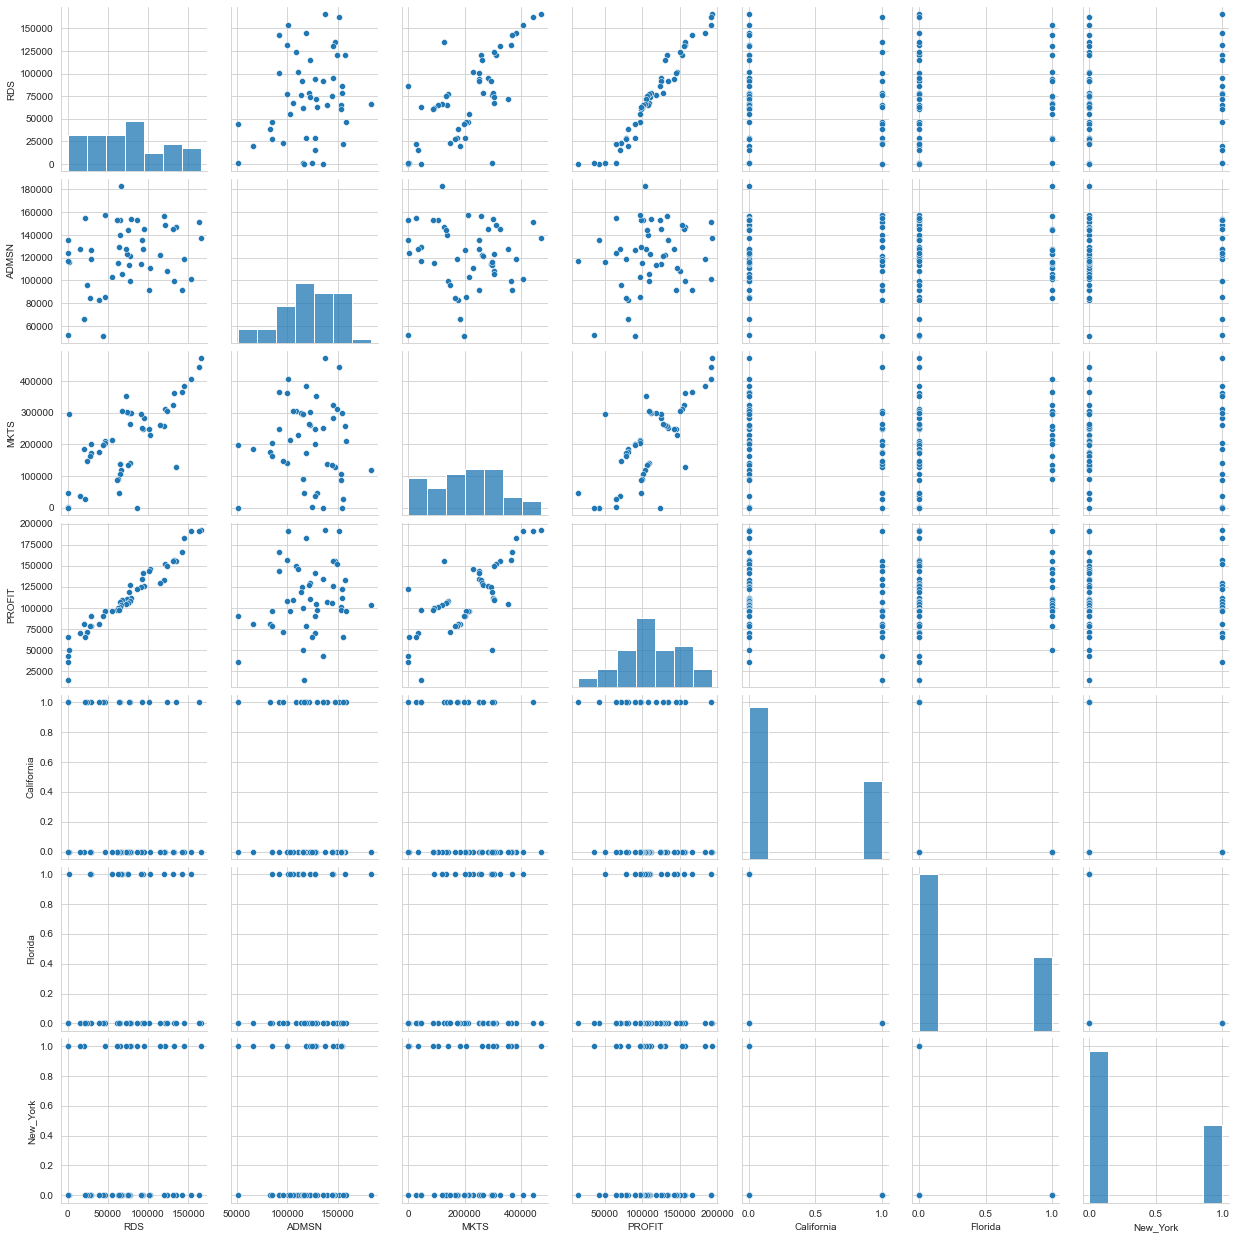

In [10]:
sns.set_style(style='whitegrid')
sns.pairplot(startup)

### Creating new columns which are transform for the existing columns

In [11]:
startup['rds_sq']=startup['RDS']**2
startup['rds_sqrt']=startup['RDS']**0.5
startup['rds_log']=np.log(startup['RDS'])
startup['admsn_sq']=startup['ADMSN']**2
startup['admsn_sqrt']=startup['ADMSN']**0.5
startup['admsn_log']=np.log(startup['ADMSN'])
startup['mkts_sq']=startup['MKTS']**2
startup['mkts_sqrt']=startup['MKTS']**0.5
startup['mkts_log']=np.log(startup['MKTS'])

In [12]:
startup

,RDS,ADMSN,MKTS,PROFIT,California,Florida,New_York,rds_sq,rds_sqrt,rds_log,admsn_sq,admsn_sqrt,admsn_log,mkts_sq,mkts_sqrt,mkts_log
0,165349.20,136897.80,471784.10,192261.83,0,0,1,2.734036e+10,406.631529,12.015815,1.874101e+10,369.997027,11.826990,2.225802e+11,686.865416,13.064277
1,162597.70,151377.59,443898.53,191792.06,1,0,0,2.643801e+10,403.234051,11.999034,2.291517e+10,389.072731,11.927533,1.970459e+11,666.257105,13.003351
2,153441.51,101145.55,407934.54,191050.39,0,1,0,2.354430e+10,391.716109,11.941075,1.023042e+10,318.033882,11.524316,1.664106e+11,638.697534,12.918862
3,144372.41,118671.85,383199.62,182901.99,0,0,1,2.084339e+10,379.963696,11.880151,1.408301e+10,344.487808,11.684117,1.468419e+11,619.031195,12.856311
4,142107.34,91391.77,366168.42,166187.94,0,1,0,2.019450e+10,376.971272,11.864338,8.352456e+09,302.310718,11.422911,1.340793e+11,605.118517,12.810849
5,131876.90,99814.71,362861.36,156991.12,0,0,1,1.739152e+10,363.148592,11.789624,9.962976e+09,315.934661,11.511071,1.316684e+11,602.379747,12.801776
6,134615.46,147198.87,127716.82,156122.51,1,0,0,1.812132e+10,366.899796,11.810178,2.166751e+10,383.665049,11.899540,1.631159e+10,357.374901,11.757571
7,130298.13,145530.06,323876.68,155752.60,0,1,0,1.697760e+10,360.968323,11.777580,2.117900e+10,381.484023,11.888138,1.048961e+11,569.101643,12.688118
8,120542.52,148718.95,311613.29,152211.77,0,0,1,1.453050e+10,347.192339,11.699758,2.211733e+10,385.640960,11.909814,9.710284e+10,558.223333,12.649518
9,123334.88,108679.17,304981.62,149759.96,1,0,0,1.521149e+10,351.190660,11.722659,1.181116e+10,329.665239,11.596155,9.301379e+10,552.251410,12.628007


## MODEL BUILDING

In [13]:
model=smf.ols("PROFIT~RDS+ADMSN+MKTS+California+Florida+New_York",data=startup).fit()
model

In [14]:
model.fittedvalues

0     192390.571365
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133819
5     163473.807120
6     158099.292789
7     160155.644651
8     151634.743327
9     154829.662529
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725742
19    115594.188411
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301170
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236605
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746174
41     74956.311047
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364708
46     56272.992679
47     46468.232003
48     49123.073082
49     48185.038790


## Model Testing

In [15]:
model.params

Intercept     37633.233317
RDS               0.806023
ADMSN            -0.027004
MKTS              0.026980
California    12492.110514
Florida       12690.899307
New_York      12450.223495
dtype: float64

In [16]:
model.tvalues

Intercept      7.417409
RDS           17.368580
ADMSN         -0.517012
MKTS           1.573889
California     5.099242
Florida        4.654306
New_York       5.007401
dtype: float64

In [17]:
model.pvalues

Intercept     2.807645e-09
RDS           2.578772e-21
ADMSN         6.077373e-01
MKTS          1.226769e-01
California    6.942555e-06
Florida       2.992503e-05
New_York      9.409010e-06
dtype: float64

In [18]:
model.rsquared,model.rsquared_adj

(0.9507524843355148, 0.945156175737278)

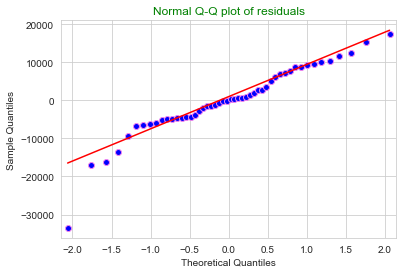

In [19]:
# Residual analysis
sm.qqplot(model.resid,line='q',color='VIOLET')
plt.title("Normal Q-Q plot of residuals",color='GREEN')
plt.show()

<AxesSubplot:>

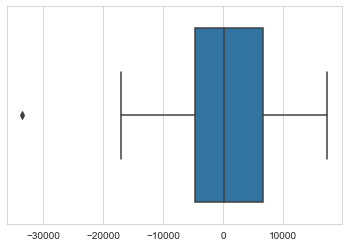

In [20]:
sns.boxplot(model.resid)

<AxesSubplot:ylabel='Density'>

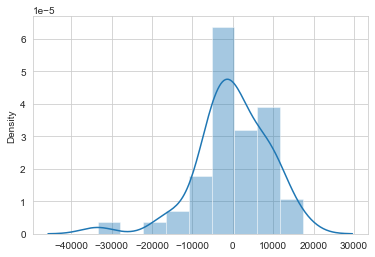

In [21]:
sns.distplot(model.resid)

#### The Residual don't have a good distribution

In [22]:
def get_standard_values(vals) : return (vals-vals.mean())/vals.std()

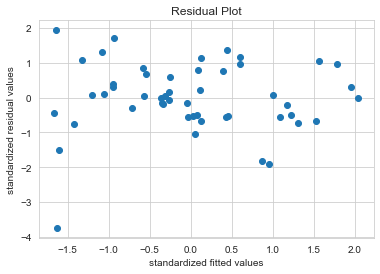

In [23]:
plt.scatter(get_standard_values(model.fittedvalues),
            get_standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [24]:
model.pvalues

Intercept     2.807645e-09
RDS           2.578772e-21
ADMSN         6.077373e-01
MKTS          1.226769e-01
California    6.942555e-06
Florida       2.992503e-05
New_York      9.409010e-06
dtype: float64

In [25]:
rsq_r=smf.ols("RDS~ADMSN+MKTS+California+Florida+New_York",data=startup).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMSN~RDS+MKTS+California+Florida+New_York",data=startup).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMSN+California+Florida+New_York",data=startup).fit().rsquared
vif_m=1/(1-rsq_m)

# storing VIF values in dataframe

d1={'Variables':['RDS','ADMSN','MKTS'],'VIF':[vif_r,vif_a,vif_m]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,RDS,2.495511
1,ADMSN,1.177766
2,MKTS,2.416797


#### Administration and marketing spend has high pvalues particularly administration which has a P-value 60%

## Calculating Cook's Distance & Checking for Values above the leverage cutoff

In [26]:
(c,_)=model.get_influence().cooks_distance

k=6
n=50
leverage_cutoff=(3*(k+1))/n
leverage_cutoff
for i in c:
    if i>leverage_cutoff:
        print(i)
print(c)

[6.58235386e-06 3.39430615e-03 2.39098625e-02 2.02032949e-02
 1.20198420e-02 1.00370545e-02 2.13697865e-03 3.57036535e-03
 6.25257579e-05 5.41213370e-03 1.89764313e-02 1.65867572e-02
 1.82797330e-02 6.34364572e-03 6.17285106e-02 3.72134923e-02
 1.35078103e-02 3.71193311e-03 2.94854637e-03 2.81922632e-02
 6.02783698e-04 1.00287995e-02 3.02178458e-03 3.16115938e-04
 4.34597714e-03 3.56884817e-03 4.96640589e-03 2.78597505e-02
 9.20897921e-04 9.83021753e-05 2.28936702e-05 3.65145588e-06
 5.61582965e-04 2.31043413e-04 1.79909587e-02 7.13289876e-03
 5.07832731e-02 6.16526092e-05 4.78300794e-02 1.37854568e-03
 1.94676476e-03 1.88154422e-03 1.42427115e-04 2.00561912e-02
 1.00026060e-04 8.09098154e-02 3.62771434e-02 3.84131479e-03
 1.34036686e-01 2.26250945e-01]


#### All values are below the leverage cutoff

## Creating model with different transformed columns instead of the Administration Column

In [27]:
model_admsn_sq=smf.ols('PROFIT~RDS+admsn_sq+MKTS+California+Florida+New_York',data=startup).fit()
model_admsn_sqrt=smf.ols('PROFIT~RDS+admsn_sqrt+MKTS+California+Florida+New_York',data=startup).fit()
model_admsn_log=smf.ols('PROFIT~RDS+admsn_log+MKTS+California+Florida+New_York',data=startup).fit()

## Improving the Model

In [28]:
startup2=startup.drop(startup.index[[49]],axis=0).reset_index(drop=True)
startup2

,RDS,ADMSN,MKTS,PROFIT,California,Florida,New_York,rds_sq,rds_sqrt,rds_log,admsn_sq,admsn_sqrt,admsn_log,mkts_sq,mkts_sqrt,mkts_log
0,165349.20,136897.80,471784.10,192261.83,0,0,1,2.734036e+10,406.631529,12.015815,1.874101e+10,369.997027,11.826990,2.225802e+11,686.865416,13.064277
1,162597.70,151377.59,443898.53,191792.06,1,0,0,2.643801e+10,403.234051,11.999034,2.291517e+10,389.072731,11.927533,1.970459e+11,666.257105,13.003351
2,153441.51,101145.55,407934.54,191050.39,0,1,0,2.354430e+10,391.716109,11.941075,1.023042e+10,318.033882,11.524316,1.664106e+11,638.697534,12.918862
3,144372.41,118671.85,383199.62,182901.99,0,0,1,2.084339e+10,379.963696,11.880151,1.408301e+10,344.487808,11.684117,1.468419e+11,619.031195,12.856311
4,142107.34,91391.77,366168.42,166187.94,0,1,0,2.019450e+10,376.971272,11.864338,8.352456e+09,302.310718,11.422911,1.340793e+11,605.118517,12.810849
5,131876.90,99814.71,362861.36,156991.12,0,0,1,1.739152e+10,363.148592,11.789624,9.962976e+09,315.934661,11.511071,1.316684e+11,602.379747,12.801776
6,134615.46,147198.87,127716.82,156122.51,1,0,0,1.812132e+10,366.899796,11.810178,2.166751e+10,383.665049,11.899540,1.631159e+10,357.374901,11.757571
7,130298.13,145530.06,323876.68,155752.60,0,1,0,1.697760e+10,360.968323,11.777580,2.117900e+10,381.484023,11.888138,1.048961e+11,569.101643,12.688118
8,120542.52,148718.95,311613.29,152211.77,0,0,1,1.453050e+10,347.192339,11.699758,2.211733e+10,385.640960,11.909814,9.710284e+10,558.223333,12.649518
9,123334.88,108679.17,304981.62,149759.96,1,0,0,1.521149e+10,351.190660,11.722659,1.181116e+10,329.665239,11.596155,9.301379e+10,552.251410,12.628007


In [29]:
print(model_admsn_sq.pvalues)
print(model_admsn_sqrt.pvalues)
print(model_admsn_log.pvalues)

Intercept     2.517322e-14
RDS           2.460902e-21
admsn_sq      5.652020e-01
MKTS          1.349188e-01
California    5.940661e-07
Florida       4.665382e-06
New_York      1.212163e-06
dtype: float64
Intercept     7.161532e-05
RDS           2.528063e-21
admsn_sqrt    6.441167e-01
MKTS          1.147103e-01
California    4.975101e-04
Florida       9.062034e-04
New_York      4.963419e-04
dtype: float64
Intercept     2.619110e-01
RDS           2.388318e-21
admsn_log     6.921231e-01
MKTS          1.062041e-01
California    2.656939e-01
Florida       2.656507e-01
New_York      2.645709e-01
dtype: float64


#### Even with transformation applied,the pvalue is very high.Thus eliminating the Administrations column

## Build Model with different transformation of the MARKETING SPEND column.

In [30]:
model1=smf.ols("PROFIT~RDS+MKTS+California+Florida+New_York",data=startup).fit()

In [31]:
model_mkts_sq=smf.ols("PROFIT~RDS+mkts_sq+California+Florida+New_York",data=startup).fit()
model_mkts_sqrt=smf.ols("PROFIT~RDS+mkts_sqrt+California+Florida+New_York",data=startup).fit()
#model_mkts_log=smf.ols("PROFIT~RDS+mkts_log+California+Florida+New_York",data=startup).fit()

In [32]:
print(model1.pvalues)
print(model_mkts_sq.pvalues)
print(model_mkts_sqrt.pvalues)

Intercept     5.420201e-21
RDS           6.509785e-23
MKTS          7.204640e-02
California    2.004515e-07
Florida       1.970877e-06
New_York      4.720949e-07
dtype: float64
Intercept     3.286941e-23
RDS           1.725308e-22
mkts_sq       1.482269e-01
California    1.151792e-07
Florida       1.853318e-07
New_York      4.591356e-07
dtype: float64
Intercept     9.373589e-16
RDS           2.420487e-24
mkts_sqrt     8.237836e-02
California    1.917196e-06
Florida       2.734192e-05
New_York      9.515707e-07
dtype: float64


#### Pvalues of marketing spend is higher than 5% in all the transfomations and in the untransformed data. Thus marketing spend column is eliminated

## Calculating Cook's Distance & checking for values above the leverage cuttoff

In [33]:
model_influence = model1.get_influence()
(c,_) = model_influence.cooks_distance
k = 5
n = 50
leverage_cutoff=3*((k+1)/n)
leverage_cutoff
for i in c:
    if i>leverage_cutoff:
        print(i)
print(c)
print(leverage_cutoff)

[9.36302693e-05 2.04471945e-03 2.59309540e-02 2.45448548e-02
 5.92472096e-03 7.71147801e-03 2.31137569e-03 4.61187082e-03
 2.82464255e-07 4.44612822e-03 2.08324844e-02 1.47599455e-02
 2.15371949e-02 6.27957407e-03 6.49573491e-02 4.24018186e-02
 1.54566352e-02 4.29524836e-03 3.17863986e-03 3.12219200e-02
 6.93418996e-04 9.21045140e-03 3.83896203e-03 2.93929630e-04
 2.48295864e-03 3.26945439e-03 6.31640990e-03 3.22658862e-02
 3.82922600e-07 3.39123158e-04 1.40869788e-04 1.19675217e-04
 5.48795206e-04 1.29348856e-04 6.89992838e-03 7.93657634e-03
 4.97609857e-02 6.41180255e-04 4.31680145e-02 5.51338381e-04
 1.92148634e-03 2.68835363e-03 3.08552920e-04 2.18841144e-02
 1.58350809e-05 9.20442792e-02 4.56219781e-02 5.17009789e-03
 4.33768102e-02 2.68318650e-01]
0.36


#### All the values below the leverage cutoff

## Building model with different transformation of the RDS column

In [34]:
model2=smf.ols("PROFIT~RDS+California+Florida+New_York",data=startup).fit()

In [35]:
print(model2.mse_resid)

92208584.51691337


In [36]:
model_rds_sq=smf.ols("PROFIT~rds_sq+California+Florida+New_York",data=startup).fit()
model_rds_sqrt=smf.ols("PROFIT~rds_sqrt+California+Florida+New_York",data=startup).fit()
#model_rds_log=smf.ols("PROFIT~rds_log+California+Florida+New_York",data=startup).fit()

In [37]:
print(model2.pvalues)
print(model_rds_sq.pvalues)
print(model_rds_sqrt.pvalues)

Intercept     3.145656e-23
RDS           1.078480e-30
California    2.205806e-07
Florida       1.714253e-07
New_York      4.913660e-07
dtype: float64
Intercept     3.892688e-27
rds_sq        1.031165e-20
California    3.520692e-06
Florida       4.712795e-08
New_York      3.135185e-06
dtype: float64
Intercept     5.086587e-05
rds_sqrt      6.151635e-25
California    7.367285e-02
Florida       1.098025e-01
New_York      3.520079e-02
dtype: float64


#### Square root transformation has very high pvalues

In [38]:
print(model2.rsquared)
print(model_rds_sq.rsquared)
print(model_rds_sqrt.rsquared)

0.9467168588373374
0.8555928118987466
0.9052794732819768


#### The untransformed data has the highest rsquared value

In [39]:
print(model2.mse_resid)
print(model_rds_sq.mse_resid)
print(model_rds_sqrt.mse_resid)

92208584.51691337
249902354.07170278
163917620.14747092


#### Untransformed data has the lowest error

## Calculating Cook's Distance & Checking for values above the leverage cutoff

In [40]:
model_influence = model2.get_influence()
(c,_)=model_influence.cooks_distance
k = 4
n = 50
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff
startup['c']=c
startup=startup[startup.c<leverage_cutoff]
startup

,RDS,ADMSN,MKTS,PROFIT,California,Florida,New_York,rds_sq,rds_sqrt,rds_log,admsn_sq,admsn_sqrt,admsn_log,mkts_sq,mkts_sqrt,mkts_log,c
0,165349.20,136897.80,471784.10,192261.83,0,0,1,2.734036e+10,406.631529,12.015815,1.874101e+10,369.997027,11.826990,2.225802e+11,686.865416,13.064277,0.002417
1,162597.70,151377.59,443898.53,191792.06,1,0,0,2.643801e+10,403.234051,11.999034,2.291517e+10,389.072731,11.927533,1.970459e+11,666.257105,13.003351,0.008784
2,153441.51,101145.55,407934.54,191050.39,0,1,0,2.354430e+10,391.716109,11.941075,1.023042e+10,318.033882,11.524316,1.664106e+11,638.697534,12.918862,0.033392
3,144372.41,118671.85,383199.62,182901.99,0,0,1,2.084339e+10,379.963696,11.880151,1.408301e+10,344.487808,11.684117,1.468419e+11,619.031195,12.856311,0.034276
4,142107.34,91391.77,366168.42,166187.94,0,1,0,2.019450e+10,376.971272,11.864338,8.352456e+09,302.310718,11.422911,1.340793e+11,605.118517,12.810849,0.006540
5,131876.90,99814.71,362861.36,156991.12,0,0,1,1.739152e+10,363.148592,11.789624,9.962976e+09,315.934661,11.511071,1.316684e+11,602.379747,12.801776,0.004258
6,134615.46,147198.87,127716.82,156122.51,1,0,0,1.812132e+10,366.899796,11.810178,2.166751e+10,383.665049,11.899540,1.631159e+10,357.374901,11.757571,0.016246
7,130298.13,145530.06,323876.68,155752.60,0,1,0,1.697760e+10,360.968323,11.777580,2.117900e+10,381.484023,11.888138,1.048961e+11,569.101643,12.688118,0.006368
8,120542.52,148718.95,311613.29,152211.77,0,0,1,1.453050e+10,347.192339,11.699758,2.211733e+10,385.640960,11.909814,9.710284e+10,558.223333,12.649518,0.000078
9,123334.88,108679.17,304981.62,149759.96,1,0,0,1.521149e+10,351.190660,11.722659,1.181116e+10,329.665239,11.596155,9.301379e+10,552.251410,12.628007,0.004318


#### remove the data that was above the leverage_cutoff

In [41]:
model3=smf.ols('PROFIT~RDS+California+Florida+New_York',data=startup).fit()

In [42]:
print(model2.rsquared)
print(model3.rsquared)

0.9467168588373374
0.9577972150801741


In [43]:
print(np.sqrt(model2.mse_resid))
print(np.sqrt(model3.mse_resid))

9602.530110179992
8098.810995630991


In [44]:
print(model2.pvalues)
print(model3.pvalues)

Intercept     3.145656e-23
RDS           1.078480e-30
California    2.205806e-07
Florida       1.714253e-07
New_York      4.913660e-07
dtype: float64
Intercept     2.820149e-26
RDS           1.775643e-32
California    2.558546e-10
Florida       3.357377e-09
New_York      1.426591e-08
dtype: float64


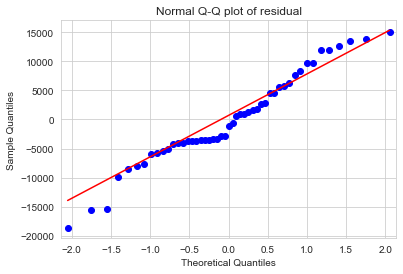

In [45]:
qqplot=sm.qqplot(model3.resid,line='q')
plt.title("Normal Q-Q plot of residual")
plt.show()

<AxesSubplot:>

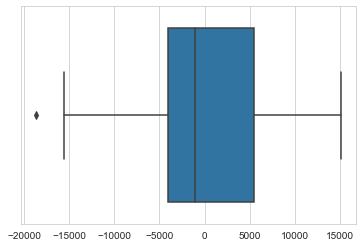

In [46]:
sns.boxplot(model3.resid)

<AxesSubplot:ylabel='Density'>

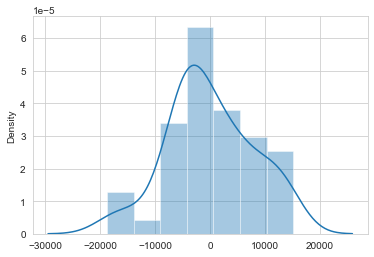

In [47]:
sns.distplot(model3.resid)

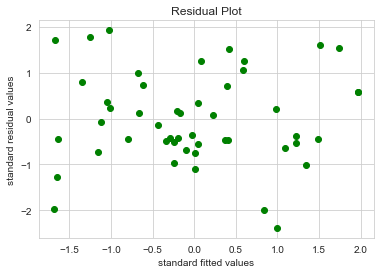

In [48]:
plt.scatter(get_standard_values(model3.fittedvalues),
               get_standard_values(model3.resid),color='GREEN')
plt.title('Residual Plot')
plt.xlabel('standard fitted values')
plt.ylabel('standard residual values')
plt.show()

#### The model 3 has the least mse error with a good rsquared values and acceptable pvalues. So model3 is taken as the finalised model

In [49]:
model_final=model3

In [50]:
created_model=pd.Series(["model","model_admsn_sq","model_admsn_sqrt","model_admsn_log","model1","model_mkts_sq","model_mkts_sqrt","model2","model_rds_sq","model_rds_sqrt","model3(final_model)"])
rsquared=pd.Series([model.rsquared,model_admsn_sq.rsquared,model_admsn_sqrt.rsquared,model_admsn_log.rsquared,model1.rsquared,model_mkts_sq.rsquared,model_mkts_sqrt.rsquared,model2.rsquared,model_rds_sq.rsquared,model_rds_sqrt.rsquared,model_final.rsquared])
rsquared_df=pd.DataFrame()
rsquared_df['models']=created_model
rsquared_df['rsquared']=rsquared

## Table of rsquared values of all models 

In [51]:
rsquared_df

,models,rsquared
0,model,0.950752
1,model_admsn_sq,0.950829
2,model_admsn_sqrt,0.950696
3,model_admsn_log,0.950632
4,model1,0.950453
5,model_mkts_sq,0.949162
6,model_mkts_sqrt,0.950210
7,model2,0.946717
8,model_rds_sq,0.855593
9,model_rds_sqrt,0.905279


In [52]:
model_final.fittedvalues

0     187645.135948
1     187302.707111
2     179040.440013
3     170260.104098
4     169646.967206
5     159904.142136
6     164111.735869
7     159859.793288
8     150510.495286
9     154762.677096
10    136334.983328
11    135980.223440
12    129663.902651
13    128786.815827
14    151277.922923
15    145522.175240
16    117201.142898
17    129057.365038
18    127911.384058
19    122230.366986
20    115743.121090
21    115575.115906
22    113196.821607
23    107841.254937
24    114460.032761
25    106138.327322
26    114302.663914
27    110368.861277
28    106613.831388
29    104980.069032
30    103251.459471
31    101276.192231
32    105097.510674
33     97863.984977
34     91022.604787
35     88743.163571
36     75627.803574
37     89069.912252
38     67373.681549
39     84502.170480
40     76376.714604
41     74988.950920
42     72138.858294
43     63458.666118
44     70926.203509
45     51436.875391
46     52962.225735
47     52545.854740
48     51057.147420
dtype: float64

In [53]:
startup['Predict']=model_final.predict(startup)
startup

,RDS,ADMSN,MKTS,PROFIT,California,Florida,New_York,rds_sq,rds_sqrt,rds_log,admsn_sq,admsn_sqrt,admsn_log,mkts_sq,mkts_sqrt,mkts_log,c,Predict
0,165349.20,136897.80,471784.10,192261.83,0,0,1,2.734036e+10,406.631529,12.015815,1.874101e+10,369.997027,11.826990,2.225802e+11,686.865416,13.064277,0.002417,187645.135948
1,162597.70,151377.59,443898.53,191792.06,1,0,0,2.643801e+10,403.234051,11.999034,2.291517e+10,389.072731,11.927533,1.970459e+11,666.257105,13.003351,0.008784,187302.707111
2,153441.51,101145.55,407934.54,191050.39,0,1,0,2.354430e+10,391.716109,11.941075,1.023042e+10,318.033882,11.524316,1.664106e+11,638.697534,12.918862,0.033392,179040.440013
3,144372.41,118671.85,383199.62,182901.99,0,0,1,2.084339e+10,379.963696,11.880151,1.408301e+10,344.487808,11.684117,1.468419e+11,619.031195,12.856311,0.034276,170260.104098
4,142107.34,91391.77,366168.42,166187.94,0,1,0,2.019450e+10,376.971272,11.864338,8.352456e+09,302.310718,11.422911,1.340793e+11,605.118517,12.810849,0.006540,169646.967206
5,131876.90,99814.71,362861.36,156991.12,0,0,1,1.739152e+10,363.148592,11.789624,9.962976e+09,315.934661,11.511071,1.316684e+11,602.379747,12.801776,0.004258,159904.142136
6,134615.46,147198.87,127716.82,156122.51,1,0,0,1.812132e+10,366.899796,11.810178,2.166751e+10,383.665049,11.899540,1.631159e+10,357.374901,11.757571,0.016246,164111.735869
7,130298.13,145530.06,323876.68,155752.60,0,1,0,1.697760e+10,360.968323,11.777580,2.117900e+10,381.484023,11.888138,1.048961e+11,569.101643,12.688118,0.006368,159859.793288
8,120542.52,148718.95,311613.29,152211.77,0,0,1,1.453050e+10,347.192339,11.699758,2.211733e+10,385.640960,11.909814,9.710284e+10,558.223333,12.649518,0.000078,150510.495286
9,123334.88,108679.17,304981.62,149759.96,1,0,0,1.521149e+10,351.190660,11.722659,1.181116e+10,329.665239,11.596155,9.301379e+10,552.251410,12.628007,0.004318,154762.677096


## Prediction for new DATAFRAME

In [54]:
new_data=pd.DataFrame({'RDS':[200000,250000,300000],'ADMSN':[150000,70000,130000],'MKTS':[10000,600000,90000],'California':[0,0,1],'Florida':[1,0,0],'New_York':[0,1,0]})
new_data

,RDS,ADMSN,MKTS,California,Florida,New_York
0,200000,150000,10000,0,1,0
1,250000,70000,600000,0,0,1
2,300000,130000,90000,1,0,0


In [55]:
new_data['Predition']=model_final.predict(new_data)
new_data

,RDS,ADMSN,MKTS,California,Florida,New_York,Predition
0,200000,150000,10000,0,1,0,217626.936399
1,250000,70000,600000,0,0,1,257801.573331
2,300000,130000,90000,1,0,0,301178.250594


## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Q2

In [56]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plot
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [57]:
toyota=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


## EDA

In [58]:
# To get the information
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

#### There are no null values

In [59]:
# TO understand the business
toyota.head(4)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0


## Sort the data that needs

In [60]:
toyota2=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyota2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


#### Rename all the columns

In [61]:
# To rename the columns
toyota3=toyota2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyota3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


## Checking for duplicates

In [62]:
toyota3[toyota3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


#### There is a duplicated value

## Lets remove duplicates

In [63]:
toyota4=toyota3.drop_duplicates().reset_index(drop=True)
toyota4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [64]:
toyota4.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## Correlation Analysis

In [65]:
toyota4.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


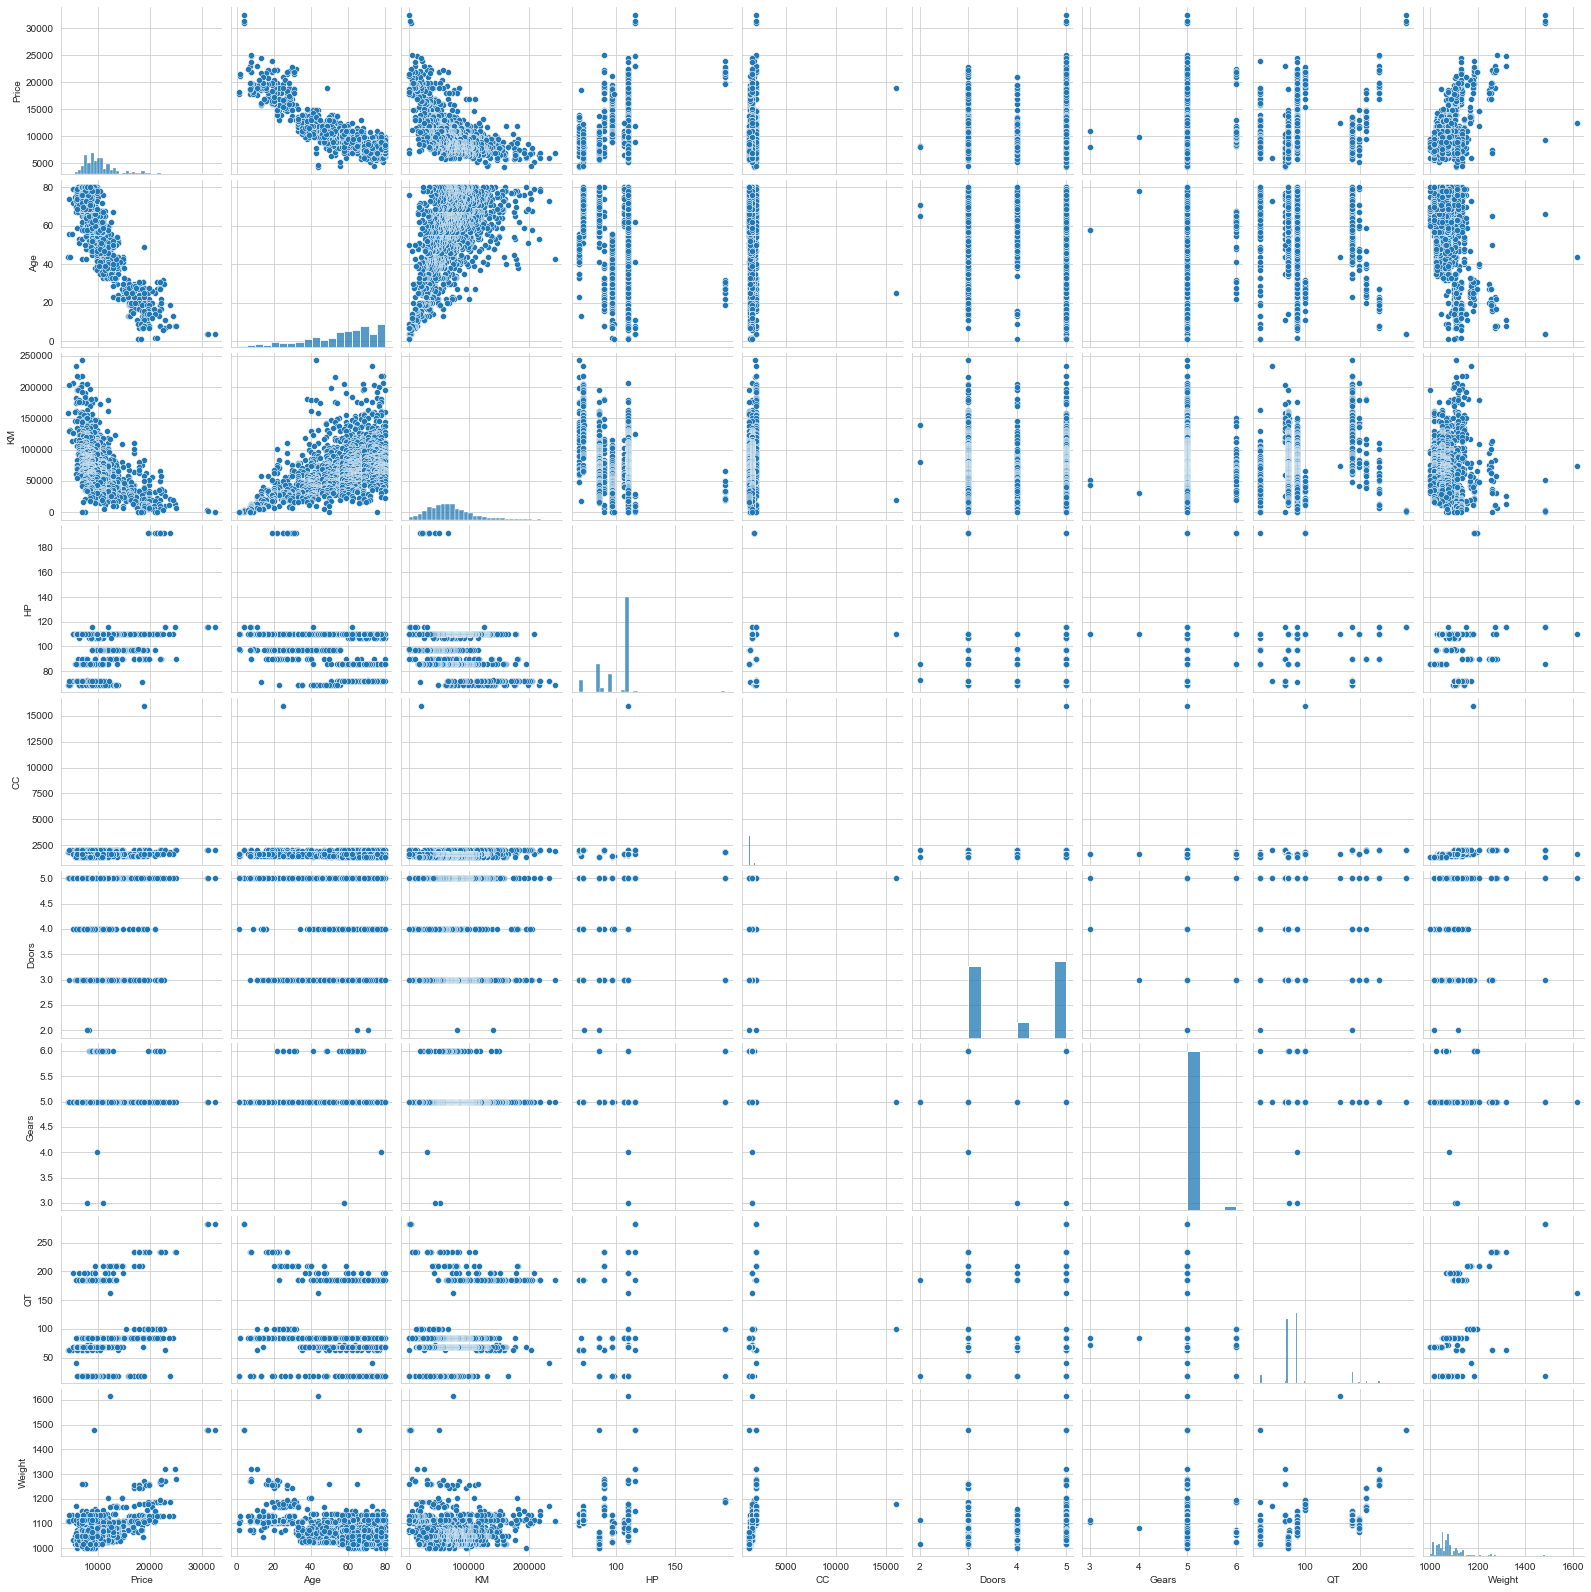

In [66]:
sns.set_style(style='whitegrid')
sns.pairplot(toyota4)

## Checking for outliers

### To find the outlier in Gears

In [67]:
toyota4['Gears'].value_counts()

5    1389
6      43
3       2
4       1
Name: Gears, dtype: int64

#### There are only very few data for 3 & 4 gears so removing them

In [68]:
toyota4=toyota4[(toyota4['Gears']!=3) & (toyota4['Gears']!=4)]

#### Lets check outliers in Doors

In [69]:
toyota4['Doors'].value_counts()

5    672
3    621
4    137
2      2
Name: Doors, dtype: int64

#### only 2 data points exist for 2 door so remove them

In [70]:
toyota4=toyota4[toyota4['Doors']!=2]

In [71]:
toyota4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


#### Checking any outliers in Age by using pandas ploting

<AxesSubplot:>

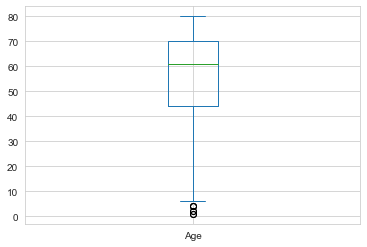

In [72]:
toyota4['Age'].plot(kind='box')

In [73]:
toyota4['Age'].value_counts()

68    69
65    62
80    59
78    46
62    42
      ..
2      2
1      2
10     1
18     1
6      1
Name: Age, Length: 77, dtype: int64

### Remove outliers

In [74]:
toyota4=toyota4[(toyota4['Age']!=15)&(toyota4['Age']!=2)&(toyota4['Age']!=6)&(toyota4['Age']!=10)&(toyota4['Age']!=18)]
toyota4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


<AxesSubplot:>

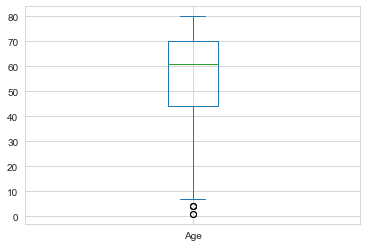

In [75]:
toyota4['Age'].plot(kind='box')

#### Using distplot we can understand that Age is normal distrubution or not

<AxesSubplot:xlabel='Age', ylabel='Density'>

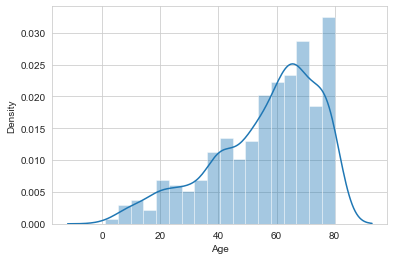

In [76]:
sns.distplot(toyota4['Age'])

### Checking outlier of KM using pandas ploting

<AxesSubplot:>

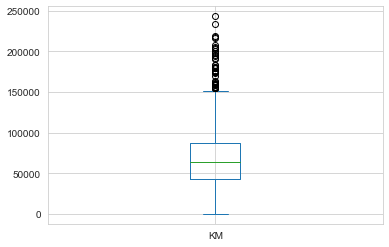

In [77]:
toyota4['KM'].plot(kind='box')

#### To find KM is normal or not

<AxesSubplot:xlabel='KM', ylabel='Density'>

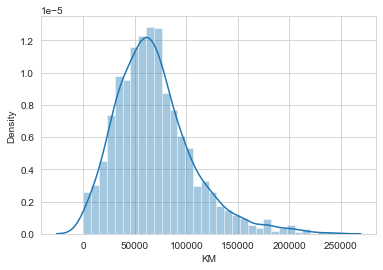

In [78]:
sns.distplot(toyota['KM'])

### To find outlier in HP

<AxesSubplot:>

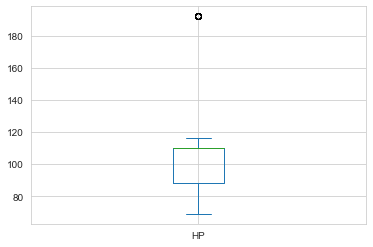

In [79]:
toyota4['HP'].plot(kind='box')

#### Removing Outlier

In [80]:
toyota4[toyota4['HP']>180]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
8,21500,27,19700,192,1800,3,5,100,1185
10,20950,25,31461,192,1800,3,6,100,1185
11,19950,22,43610,192,1800,3,6,100,1185
12,19600,25,32189,192,1800,3,6,100,1185
13,21500,31,23000,192,1800,3,6,100,1185
14,22500,32,34131,192,1800,3,6,100,1185
15,22000,28,18739,192,1800,3,6,100,1185
16,22750,30,34000,192,1800,3,5,100,1185
49,21950,31,64982,192,1800,5,6,100,1195
53,21950,27,49866,192,1800,5,5,100,1195


In [81]:
toyota4[toyota4['HP']>180].index

Int64Index([8, 10, 11, 12, 13, 14, 15, 16, 49, 53, 140], dtype='int64')

In [82]:
toyota4.loc[[8, 10, 11, 12, 13, 14, 15, 16, 49, 53, 140],'HP']=toyota4[toyota4['HP']<180].HP.max()

<AxesSubplot:>

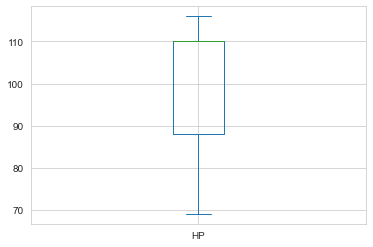

In [83]:
toyota4['HP'].plot(kind='box')

### To find outliers in CC

<AxesSubplot:>

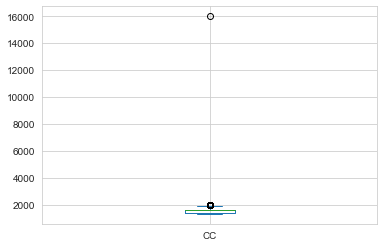

In [84]:
toyota4['CC'].plot(kind='box')

In [85]:
toyota4[toyota4['CC']>14000]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


#### Removing the outliers

In [86]:
b=toyota4[toyota4['CC']<14000].CC.max()
b

2000

In [87]:
toyota4.loc[80,'CC']=toyota4[toyota4['CC']<14000].CC.max()

<AxesSubplot:>

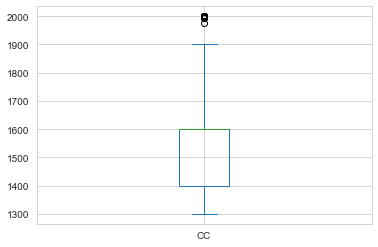

In [88]:
toyota4['CC'].plot(kind='box')

### To find outlier in WEIGHT

<AxesSubplot:>

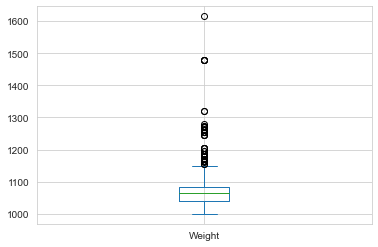

In [89]:
toyota4['Weight'].plot(kind='box')

#### REMOVE THE OUTLIERS

In [90]:
toyota4[toyota4['Weight']>1400].index

Int64Index([109, 110, 111, 220, 959], dtype='int64')

In [91]:
toyota4.loc[[109, 110, 111, 220, 959],'Weight']=toyota4[toyota4['Weight']<1400].Weight.max()

<AxesSubplot:>

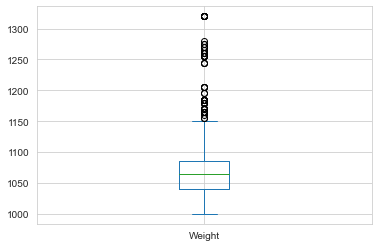

In [92]:
toyota4['Weight'].plot(kind='box')

### To find the outlier of QT(Quarterly)

<AxesSubplot:>

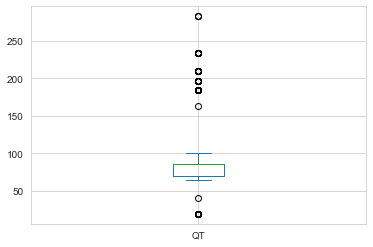

In [93]:
toyota4['QT'].plot(kind='box')

#### Remove the outliers

In [94]:
toyota4[toyota4['QT']>250].index

Int64Index([109, 110, 111], dtype='int64')

In [95]:
toyota.loc[[109, 110, 111],'QT']=toyota4[toyota4['QT']<250].QT.max()

<AxesSubplot:>

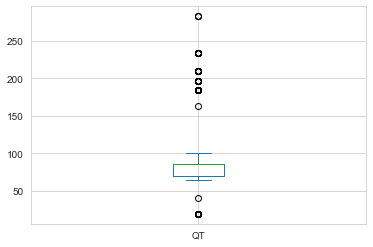

In [96]:
toyota4['QT'].plot(kind='box')

In [97]:
toyota4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


## MODEL BUILDING

### To classifying different list from a column

In [98]:
toyota4=pd.get_dummies(toyota4,columns=['Doors','Gears'])
toyota4

,Price,Age,KM,HP,CC,QT,Weight,Doors_3,Doors_4,Doors_5,Gears_5,Gears_6
0,13500,23,46986,90,2000,210,1165,1,0,0,1,0
1,13750,23,72937,90,2000,210,1165,1,0,0,1,0
2,13950,24,41711,90,2000,210,1165,1,0,0,1,0
3,14950,26,48000,90,2000,210,1165,1,0,0,1,0
4,13750,30,38500,90,2000,210,1170,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,69,1025,1,0,0,1,0
1431,10845,72,19000,86,1300,69,1015,1,0,0,1,0
1432,8500,71,17016,86,1300,69,1015,1,0,0,1,0
1433,7250,70,16916,86,1300,69,1015,1,0,0,1,0


#### First model

In [99]:
model1=smf.ols('Price~Age+KM+HP+CC+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+QT+Weight',data=toyota4).fit()

## MODEL TESTING

In [100]:
model1.params

Intercept   -6575.107468
Age          -113.766923
KM             -0.018467
HP             35.225205
CC             -3.541721
Doors_3     -2267.057520
Doors_4     -1801.710628
Doors_5     -2506.339321
Gears_5     -3708.009963
Gears_6     -2867.097506
QT              6.231151
Weight         30.233152
dtype: float64

In [101]:
model1.tvalues

Intercept    -8.738341
Age         -42.267255
KM          -14.244634
HP           10.233948
CC          -10.439611
Doors_3      -9.074888
Doors_4      -7.257361
Doors_5      -8.950411
Gears_5     -10.033350
Gears_6      -6.975484
QT            4.348964
Weight       21.059744
dtype: float64

In [102]:
np.around(model1.pvalues,5)

Intercept    0.00000
Age          0.00000
KM           0.00000
HP           0.00000
CC           0.00000
Doors_3      0.00000
Doors_4      0.00000
Doors_5      0.00000
Gears_5      0.00000
Gears_6      0.00000
QT           0.00001
Weight       0.00000
dtype: float64

In [103]:
model1.rsquared

0.8641148034511302

In [104]:
model1.rsquared_adj

0.8632492926450865

### Residual Analysis

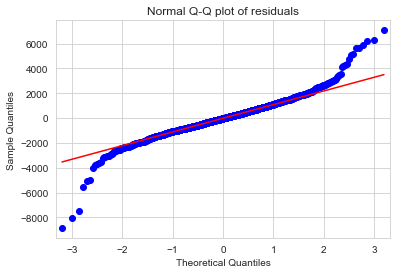

In [105]:
sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

<AxesSubplot:>

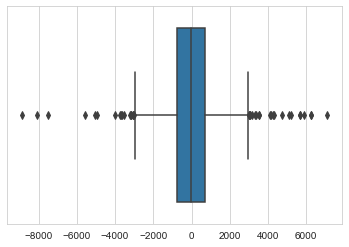

In [106]:
sns.boxplot(model1.resid)

<AxesSubplot:ylabel='Density'>

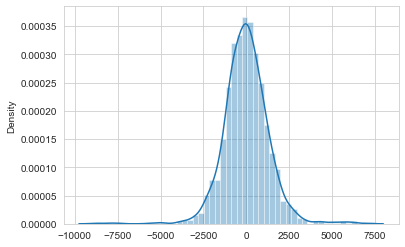

In [107]:
sns.distplot(model1.resid)

In [108]:
def get_standard_values(vals):return (vals-vals.mean())/vals.std()

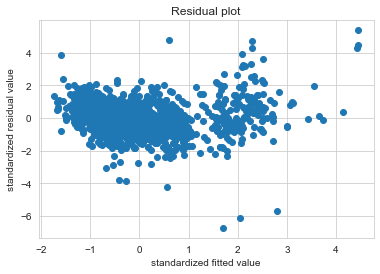

In [109]:
plt.scatter(get_standard_values(model1.fittedvalues),
             get_standard_values(model1.resid))
plt.title('Residual plot')
plt.xlabel('standardized fitted value')
plt.ylabel('standardized residual value')
plt.show()

## MODEL VALIDATION

In [110]:
# Calculating VIF
rsq_age=smf.ols('Age~KM+HP+CC+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+QT+Weight',data=toyota4).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km=smf.ols('KM~Age+HP+CC+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+QT+Weight',data=toyota4).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP~Age+KM+CC+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+QT+Weight',data=toyota4).fit().rsquared
vif_hp=1/(1-rsq_km)

rsq_cc=smf.ols('CC~Age+KM+HP+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+QT+Weight',data=toyota4).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_qt=smf.ols('QT~Age+KM+HP+CC+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Weight',data=toyota4).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_wt=smf.ols('Weight~Age+KM+HP+CC+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+QT',data=toyota4).fit().rsquared
vif_wt=1/(1-rsq_qt)

# Soring VIF VALUES in dataframe

d1=pd.DataFrame({'variable':['AGE','KM','HP','CC','QT','Weight'],
                 'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_qt,vif_wt]})
d1

,variable,VIF
0,AGE,1.992256
1,KM,1.918115
2,HP,1.918115
3,CC,3.303745
4,QT,2.823857
5,Weight,2.823857


## Removing the data points with high cook's Distance

In [111]:
model1_influence=model1.get_influence()
(c,_)=model1_influence.cooks_distance
k=8
n=1430
leverage_cutoff=3*((k+1)/n)
leverage_cutoff
toyota4['c']=c
toyota4=toyota4[toyota4.c<leverage_cutoff]

In [112]:
model2=smf.ols('Price~Age+KM+HP+CC+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+QT+Weight',data=toyota4).fit()

In [113]:
model2.rsquared

0.8821284767192251

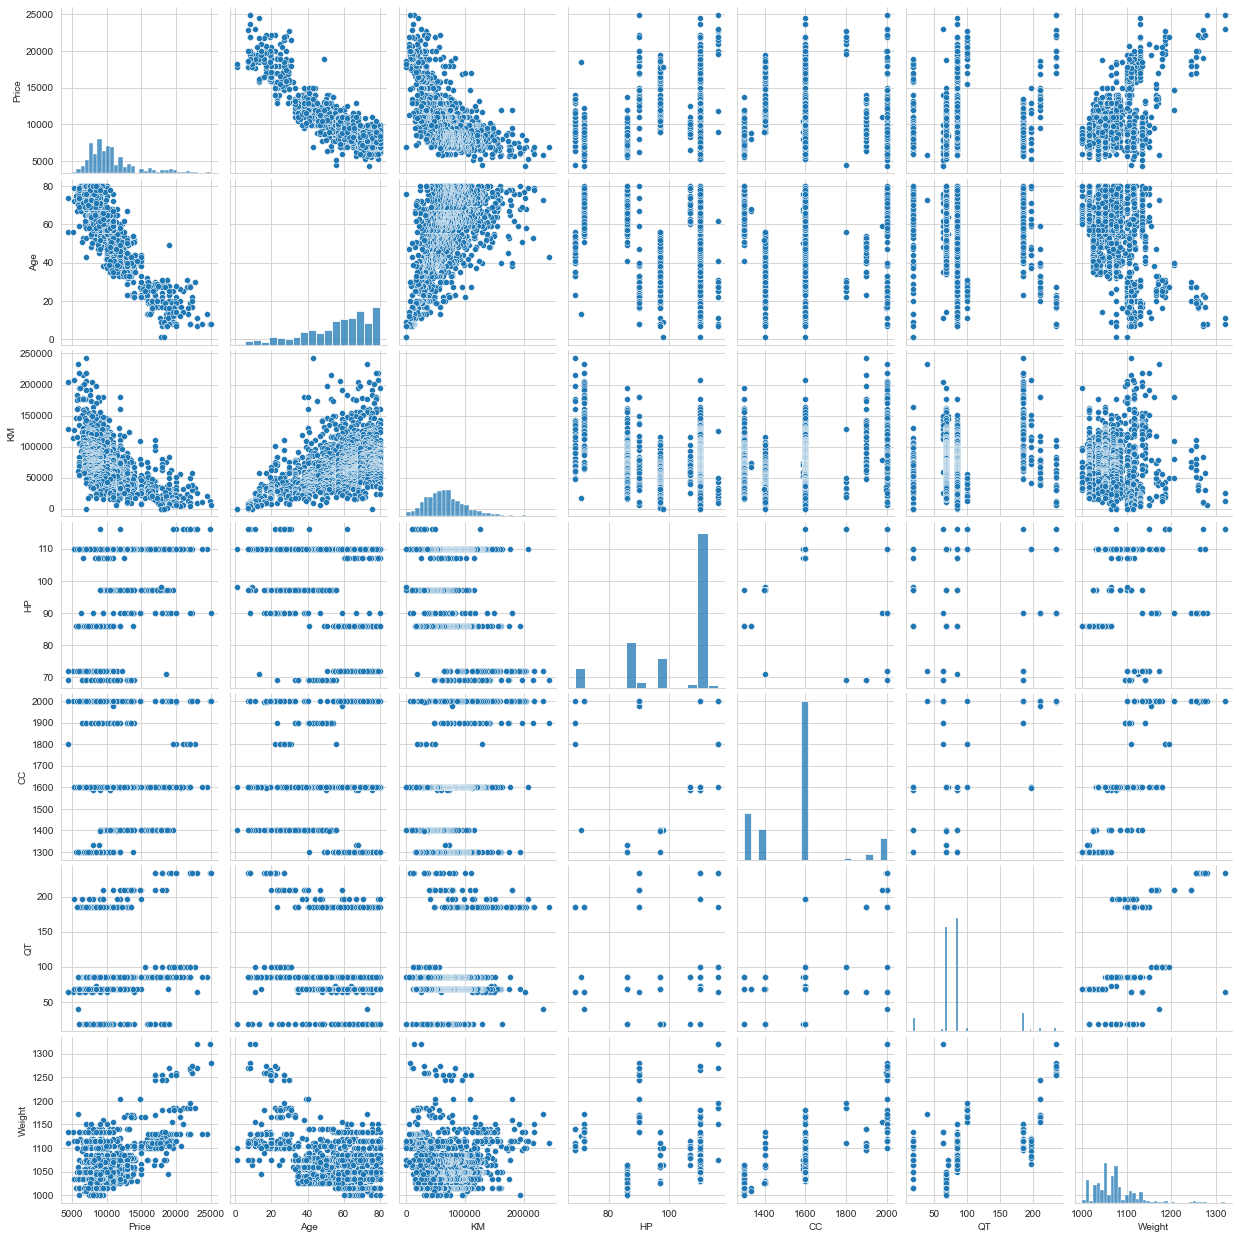

In [114]:
sns.pairplot(toyota4.iloc[:,:7])

## Try different transformation of different columns

### Transformation of Age column

In [115]:
toyota4['age_sq']=toyota4['Age']**2
toyota4['age_sqrt']=toyota4['Age']**0.5
toyota4['age_log']=np.log(toyota4['Age'])
toyota4

,Price,Age,KM,HP,CC,QT,Weight,Doors_3,Doors_4,Doors_5,Gears_5,Gears_6,c,age_sq,age_sqrt,age_log
0,13500,23,46986,90,2000,210,1165,1,0,0,1,0,0.005262,529,4.795832,3.135494
1,13750,23,72937,90,2000,210,1165,1,0,0,1,0,0.002833,529,4.795832,3.135494
2,13950,24,41711,90,2000,210,1165,1,0,0,1,0,0.003881,576,4.898979,3.178054
3,14950,26,48000,90,2000,210,1165,1,0,0,1,0,0.000875,676,5.099020,3.258097
4,13750,30,38500,90,2000,210,1170,1,0,0,1,0,0.003107,900,5.477226,3.401197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,69,1025,1,0,0,1,0,0.000777,4761,8.306624,4.234107
1431,10845,72,19000,86,1300,69,1015,1,0,0,1,0,0.001984,5184,8.485281,4.276666
1432,8500,71,17016,86,1300,69,1015,1,0,0,1,0,0.000003,5041,8.426150,4.262680
1433,7250,70,16916,86,1300,69,1015,1,0,0,1,0,0.000734,4900,8.366600,4.248495


,Price,age_sq,age_sqrt,age_log
Price,1.000000,-0.828021,-0.899638,-0.876450
age_sq,-0.828021,1.000000,0.942192,0.862511
age_sqrt,-0.899638,0.942192,1.000000,0.977585
age_log,-0.876450,0.862511,0.977585,1.000000


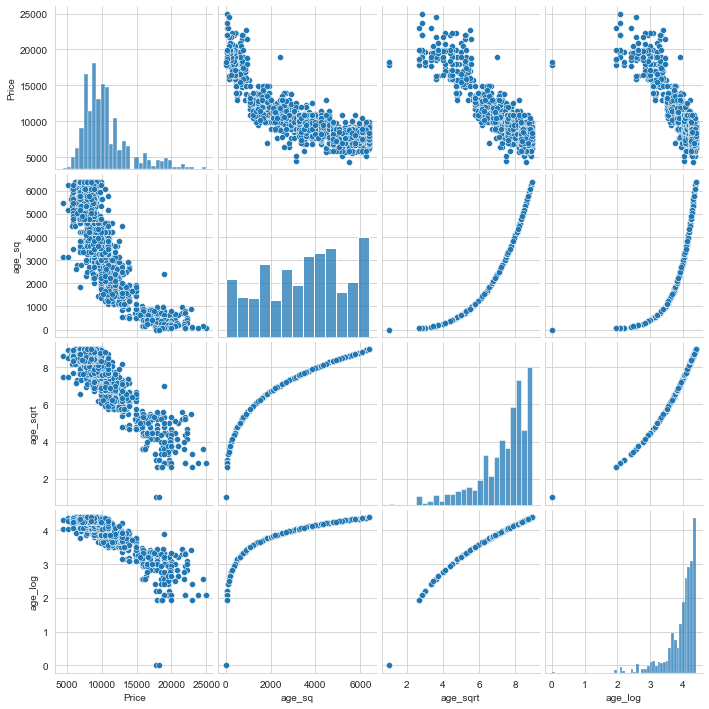

In [116]:
sns.pairplot(toyota4.loc[:,['Price','age_sq','age_sqrt','age_log']])
toyota4.loc[:,['Price','age_sq','age_sqrt','age_log']].corr()

#### Sqrt has a good linearity and correlation creation a model with that transformation

In [117]:
model3=smf.ols('Price~age_sqrt+KM+HP+CC+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+QT+Weight',data=toyota4).fit()

In [118]:
model3.pvalues

Intercept     1.570650e-06
age_sqrt     4.098625e-280
KM            6.091821e-47
HP            4.519189e-19
CC            1.432842e-23
Doors_3       9.452821e-07
Doors_4       2.037578e-04
Doors_5       7.683128e-08
Gears_5       8.108537e-09
Gears_6       2.307196e-04
QT            5.843957e-02
Weight        9.324163e-80
dtype: float64

In [119]:
model3.rsquared

0.8868714217100091

In [120]:
np.sqrt(model3.mse_resid)

1144.7181423794902

### This model has higher rsquared value and less error

## Transformation for KM column

In [121]:
toyota4['km_sq']=toyota4['KM']**2
toyota4['km_sqrt']=toyota4['KM']**0.5
toyota4['km_log']=np.log(toyota4['KM'])

,Price,KM,km_sq,km_sqrt,km_log
Price,1.000000,-0.567133,-0.440961,-0.625088,-0.506468
KM,-0.567133,1.000000,0.945332,0.973810,0.674700
km_sq,-0.440961,0.945332,1.000000,0.856404,0.524432
km_sqrt,-0.625088,0.973810,0.856404,1.000000,0.788777
km_log,-0.506468,0.674700,0.524432,0.788777,1.000000


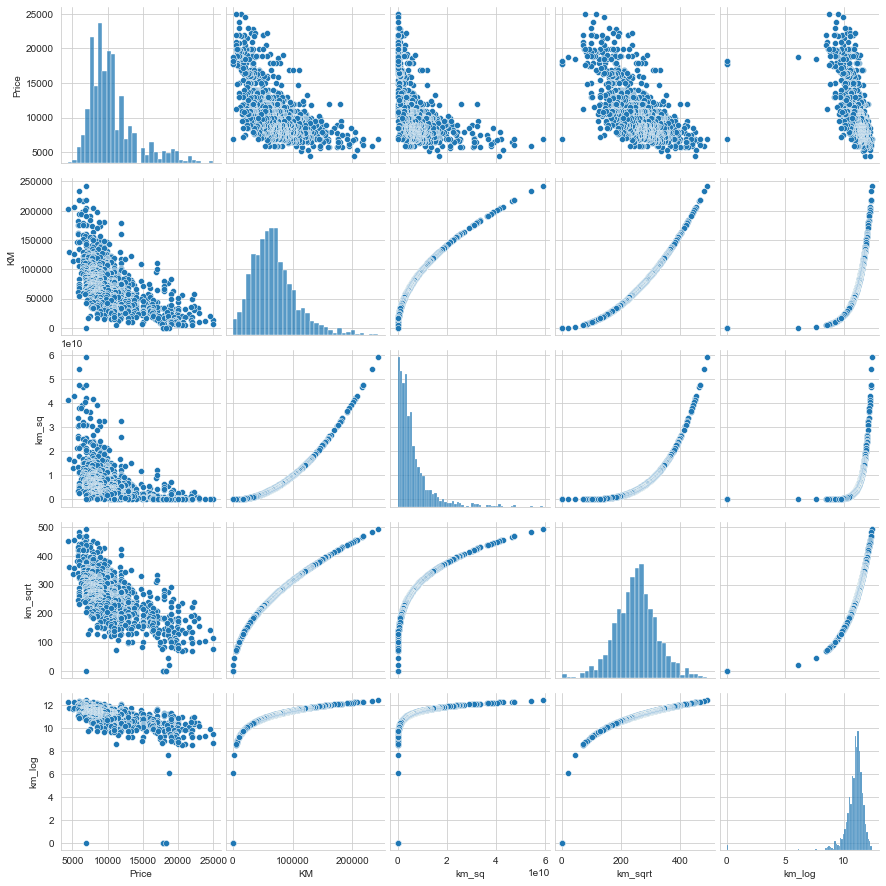

In [122]:
sns.pairplot(toyota4.loc[:,['Price','KM','km_sq','km_sqrt','km_log']])
toyota4.loc[:,['Price','KM','km_sq','km_sqrt','km_log']].corr()

In [123]:
toyota4['km_sqrt4']=toyota4['KM']**0.4
toyota4['km_sqrt3']=toyota4['KM']**0.3
toyota4['km_sqrt2']=toyota4['KM']**0.2
toyota4

,Price,Age,KM,HP,CC,QT,Weight,Doors_3,Doors_4,Doors_5,...,c,age_sq,age_sqrt,age_log,km_sq,km_sqrt,km_log,km_sqrt4,km_sqrt3,km_sqrt2
0,13500,23,46986,90,2000,210,1165,1,0,0,...,0.005262,529,4.795832,3.135494,2207684196,216.762543,10.757605,73.924329,25.211027,8.597926
1,13750,23,72937,90,2000,210,1165,1,0,0,...,0.002833,529,4.795832,3.135494,5319805969,270.068510,11.197351,88.141241,28.766324,9.388357
2,13950,24,41711,90,2000,210,1165,1,0,0,...,0.003881,576,4.898979,3.178054,1739807521,204.232710,10.638520,70.485574,24.326251,8.395569
3,14950,26,48000,90,2000,210,1165,1,0,0,...,0.000875,676,5.099020,3.258097,2304000000,219.089023,10.778956,74.558385,25.373032,8.634720
4,13750,30,38500,90,2000,210,1170,1,0,0,...,0.003107,900,5.477226,3.401197,1482250000,196.214169,10.558414,68.262830,23.748611,8.262132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,69,1025,1,0,0,...,0.000777,4761,8.306624,4.234107,422055936,143.331783,9.930324,53.097491,19.670052,7.286803
1431,10845,72,19000,86,1300,69,1015,1,0,0,...,0.001984,5184,8.485281,4.276666,361000000,137.840488,9.852194,51.463751,19.214367,7.173824
1432,8500,71,17016,86,1300,69,1015,1,0,0,...,0.000003,5041,8.426150,4.262680,289544256,130.445391,9.741909,49.242828,18.589052,7.017323
1433,7250,70,16916,86,1300,69,1015,1,0,0,...,0.000734,4900,8.366600,4.248495,286151056,130.061524,9.736015,49.126867,18.556211,7.009056


,Price,KM,km_sqrt4,km_sqrt3,km_sqrt2
0,13500,46986,73.924329,25.211027,8.597926
1,13750,72937,88.141241,28.766324,9.388357
2,13950,41711,70.485574,24.326251,8.395569
3,14950,48000,74.558385,25.373032,8.634720
4,13750,38500,68.262830,23.748611,8.262132
...,...,...,...,...,...
1430,7500,20544,53.097491,19.670052,7.286803
1431,10845,19000,51.463751,19.214367,7.173824
1432,8500,17016,49.242828,18.589052,7.017323
1433,7250,16916,49.126867,18.556211,7.009056


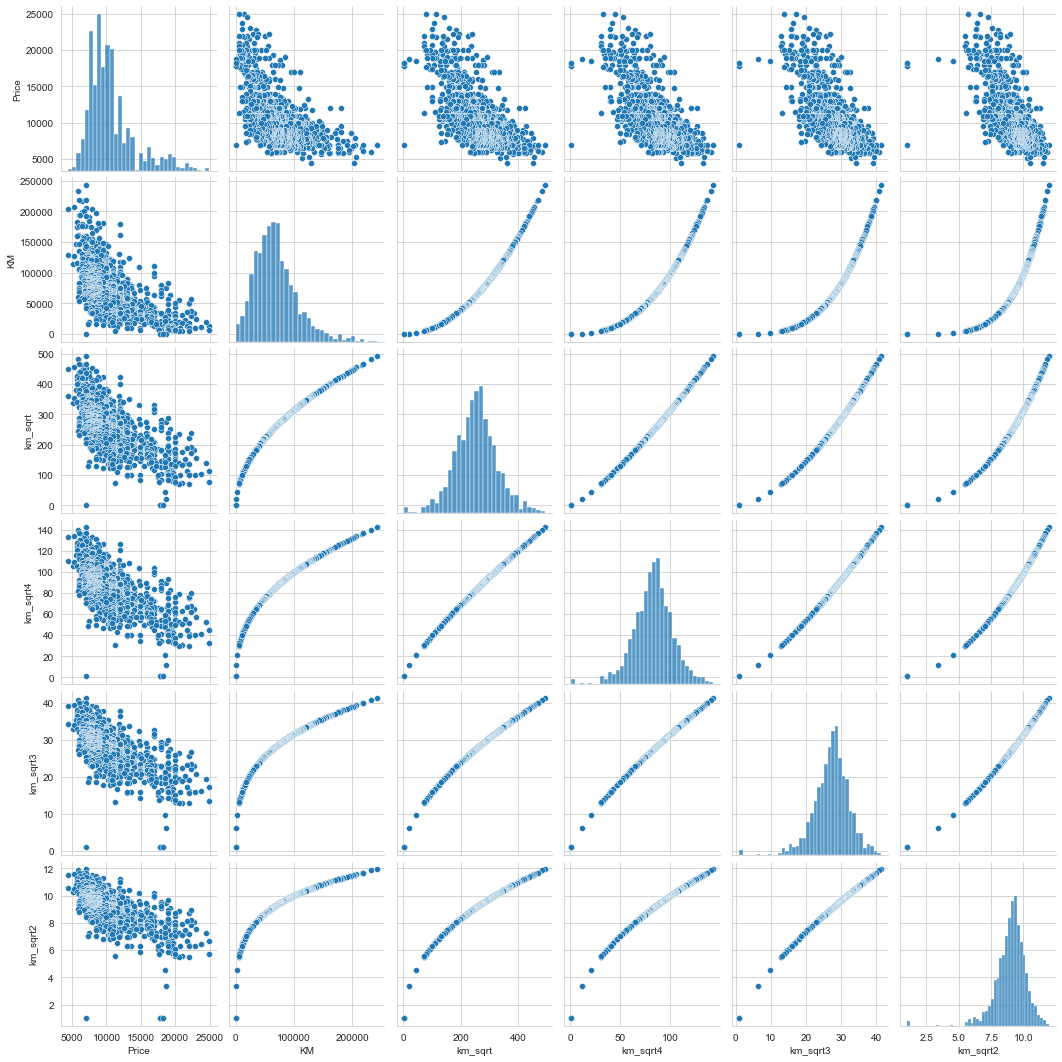

In [124]:
sns.pairplot(toyota4.loc[:,['Price','KM','km_sqrt','km_sqrt4','km_sqrt3','km_sqrt2']])
toyota4.loc[:,['Price','KM','km_sqrt4','km_sqrt3','km_sqrt2']]

In [125]:
model4=smf.ols('Price~age_sqrt+km_sqrt+HP+CC+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+QT+Weight',data=toyota4).fit()
model4_sqrt4=smf.ols('Price~age_sqrt+km_sqrt4+HP+CC+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+QT+Weight',data=toyota4).fit()
model4_sqrt3=smf.ols('Price~age_sqrt+km_sqrt3+HP+CC+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+QT+Weight',data=toyota4).fit()
model4_sqrt2=smf.ols('Price~age_sqrt+km_sqrt2+HP+CC+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+QT+Weight',data=toyota4).fit()

In [126]:
print(model4.rsquared)
print(model4_sqrt4.rsquared)
print(model4_sqrt3.rsquared)
print(model4_sqrt2.rsquared)

0.8838119153588562
0.8821884903203812
0.8798193029484918
0.8764596217673053


In [127]:
print(np.sqrt(model4.mse_resid))
print(np.sqrt(model4_sqrt4.mse_resid))
print(np.sqrt(model4_sqrt3.mse_resid))
print(np.sqrt(model4_sqrt2.mse_resid))

1160.0940450008836
1168.1705730202686
1179.858051510746
1196.2359903114948


### The untransformed data has a better error

## Trying transformations for weight column

<AxesSubplot:>

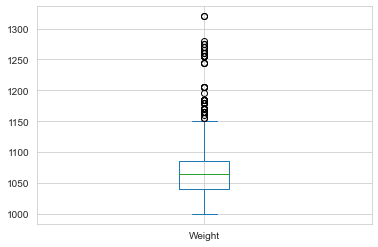

In [128]:
toyota4['Weight'].plot(kind='box')

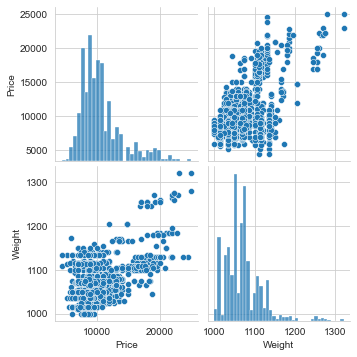

In [129]:
sns.pairplot(toyota4.loc[:,['Price','Weight']])

In [130]:
toyota4['wt_sq']=toyota4['Weight']**2
toyota4['wt_sqrt']=toyota4['Weight']**0.5
toyota4['wt_log']=np.log(toyota4['Weight'])
toyota4['wt_sq3']=toyota4['Weight']**3
toyota4['wt_sq4']=toyota4['Weight']**4

,Price,Weight,wt_sq,wt_sqrt,wt_log,wt_sq3,wt_sq4
0,13500,1165,1357225,34.132096,7.060476,1581167125,1842059700625
1,13750,1165,1357225,34.132096,7.060476,1581167125,1842059700625
2,13950,1165,1357225,34.132096,7.060476,1581167125,1842059700625
3,14950,1165,1357225,34.132096,7.060476,1581167125,1842059700625
4,13750,1170,1368900,34.205263,7.064759,1601613000,1873887210000
...,...,...,...,...,...,...,...
1430,7500,1025,1050625,32.015621,6.932448,1076890625,1103812890625
1431,10845,1015,1030225,31.859065,6.922644,1045678375,1061363550625
1432,8500,1015,1030225,31.859065,6.922644,1045678375,1061363550625
1433,7250,1015,1030225,31.859065,6.922644,1045678375,1061363550625


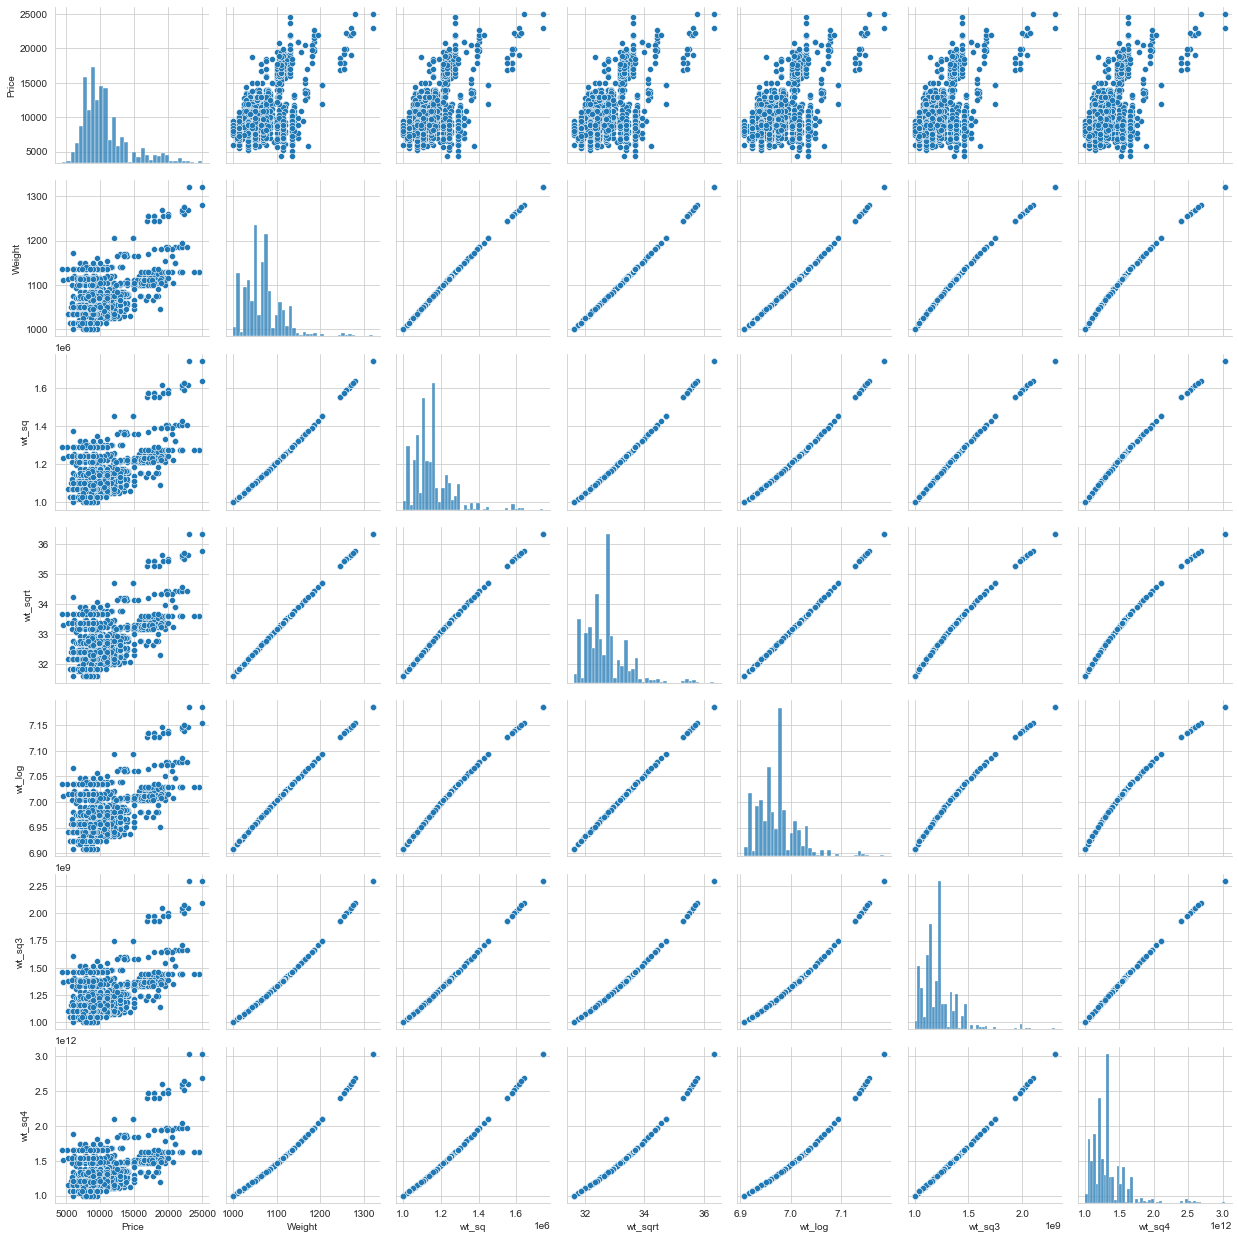

In [131]:
sns.pairplot(toyota4.loc[:,['Price','Weight','wt_sq','wt_sqrt','wt_log','wt_sq3','wt_sq4']])
toyota4.loc[:,['Price','Weight','wt_sq','wt_sqrt','wt_log','wt_sq3','wt_sq4']]

In [132]:
model5_sq=smf.ols('Price~age_sqrt+KM+HP+CC+Doors_4+Doors_5+Gears_5+Gears_6+QT+wt_sq',data=toyota4).fit()
model5_sq3=smf.ols('Price~age_sqrt+KM+HP+CC+Doors_4+Doors_5+Gears_5+Gears_6+QT+wt_sq3',data=toyota4).fit()
model5_sq4=smf.ols('Price~age_sqrt+KM+HP+CC+Doors_4+Doors_5+Gears_5+Gears_6+QT+wt_sq4',data=toyota4).fit()

In [133]:
print(model4.rsquared)
print(model5_sq.rsquared)
print(model5_sq3.rsquared)
print(model5_sq4.rsquared)

0.8838119153588562
0.8874010492656467
0.8875137088368192
0.8872261067598058


In [134]:
print(np.sqrt(model3.mse_resid))
print(np.sqrt(model4.mse_resid))
print(np.sqrt(model5_sq.mse_resid))
print(np.sqrt(model5_sq3.mse_resid))
print(np.sqrt(model5_sq4.mse_resid))

1144.7181423794902
1160.0940450008836
1142.0354182767048
1141.4639501663016
1142.9222515651957


### Cubing the weight variable gives the best rsquared and the best error

In [135]:
model5_sq3.params

Intercept    10072.949863
age_sqrt     -1517.041568
KM              -0.016831
HP              28.733782
CC              -2.838300
Doors_4        304.087171
Doors_5       -206.053422
Gears_5       4655.259975
Gears_6       5417.689888
QT               1.907262
wt_sq3           0.000008
dtype: float64

In [136]:
model5_sq3.pvalues

Intercept    5.126455e-136
age_sqrt     1.275627e-290
KM            6.602464e-46
HP            1.016473e-19
CC            4.083957e-20
Doors_4       6.341154e-03
Doors_5       4.057966e-03
Gears_5      4.663413e-124
Gears_6      1.435835e-105
QT            1.625484e-01
wt_sq3        1.720962e-81
dtype: float64

In [137]:
model5_sq3.rsquared

0.8875137088368192

In [138]:
np.sqrt(model5_sq3.mse_resid)

1141.4639501663016

## Was only able to get an rsquared value of 0.8876

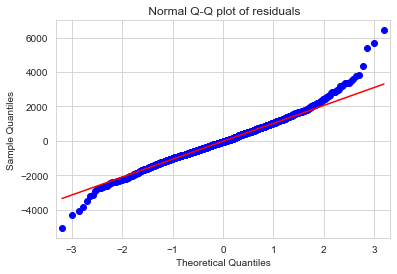

In [139]:
qqplot=sm.qqplot(model5_sq3.resid,line='q')
plt.title(" Normal Q-Q plot of residuals")
plt.show()

<AxesSubplot:>

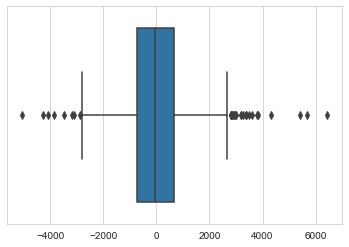

In [140]:
sns.boxplot(model5_sq3.resid)

<AxesSubplot:ylabel='Density'>

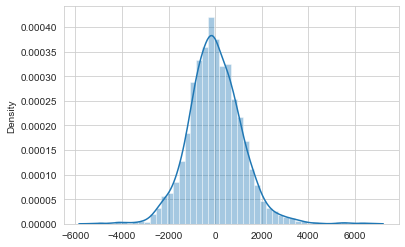

In [141]:
sns.distplot(model5_sq3.resid)

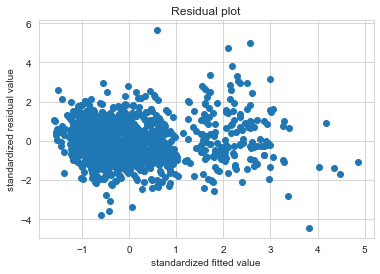

In [142]:
plt.scatter(get_standard_values(model5_sq3.fittedvalues),
            get_standard_values(model5_sq3.resid))
plt.title('Residual plot')
plt.xlabel('standardized fitted value')
plt.ylabel('standardized residual value')
plt.show()

## Take the model5_sq3 as the finalised model

In [143]:
model_finalised=model5_sq3

# Predicting for data

### Making new data frame

In [144]:
new=pd.DataFrame({'Age':[21,24],'KM':[2745,5555,],'HP':[1600,160],'CC':[1,1700],'Doors_3':[5,0],'Doors_4':[7,2],'Doors_5':[8,1],'Gears_5':[4,3],'Gears_6':[1,1],'QT':[177,4130],'Weight':[1400,2000]})
new['age_sqrt']=new['Age']**0.5
new['wt_sq3']=new['Weight']**3
new

,Age,KM,HP,CC,Doors_3,Doors_4,Doors_5,Gears_5,Gears_6,QT,Weight,age_sqrt,wt_sq3
0,21,2745,1600,1,5,7,8,4,1,177,1400,4.582576,2744000000
1,24,5555,160,1700,0,2,1,3,1,4130,2000,4.898979,8000000000


### Predict in new dataframe

In [145]:
new['Prediction']=model_finalised.predict(new)
new

,Age,KM,HP,CC,Doors_3,Doors_4,Doors_5,Gears_5,Gears_6,QT,Weight,age_sqrt,wt_sq3,Prediction
0,21,2745,1600,1,5,7,8,4,1,177,1400,4.582576,2744000000,95453.327498
1,24,5555,160,1700,0,2,1,3,1,4130,2000,4.898979,8000000000,92812.770809
